<a href="https://colab.research.google.com/github/kumarrshalini/Technical_Analysis_Stock_Trading/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
from google.colab import files

In [18]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [19]:
apple_data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAPL.csv')

In [21]:
from datetime import datetime
df = apple_data.set_index(pd.DatetimeIndex(apple_data['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-15,2020-01-15,77.962502,78.875000,77.387497,77.834999,77.168564,121923600
2020-01-16,2020-01-16,78.397499,78.925003,78.022499,78.809998,78.135223,108829200
2020-01-17,2020-01-17,79.067497,79.684998,78.750000,79.682503,79.000244,137816400
2020-01-21,2020-01-21,79.297501,79.754997,79.000000,79.142502,78.464882,110843200
2020-01-22,2020-01-22,79.644997,79.997498,79.327499,79.425003,78.744957,101832400


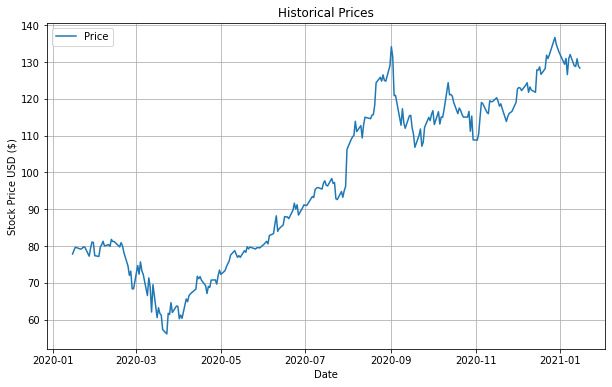

In [22]:
title='Historical Prices'
apple_stocks=df
plt.figure(figsize=(10,6))
plt.plot(apple_stocks['Close'],label='Price')
plt.title(title)
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Moving Average Convergence Divergence (MACD)= 12-day EMA-26-day EMA 

In [38]:
EMA_12=apple_stocks.Close.ewm(span=12, adjust=False).mean()

In [39]:
EMA_26=apple_stocks.Close.ewm(span=26, adjust=False).mean()

In [40]:
MACD=EMA_12-EMA_26

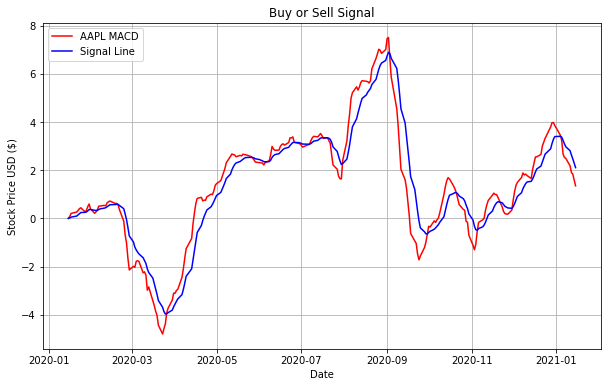

In [46]:
signal = MACD.ewm(span=9, adjust=False).mean()
plt.figure(figsize=(10,6))
plt.plot(apple_stocks.index, MACD, label='AAPL MACD', color = 'red')
plt.plot(apple_stocks.index, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.title('Buy or Sell Signal')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.grid(True)
plt.show()

When the MACD line and Signal line intersect with each other, is an indication whether to buy or sell.

10 Days Moving Average

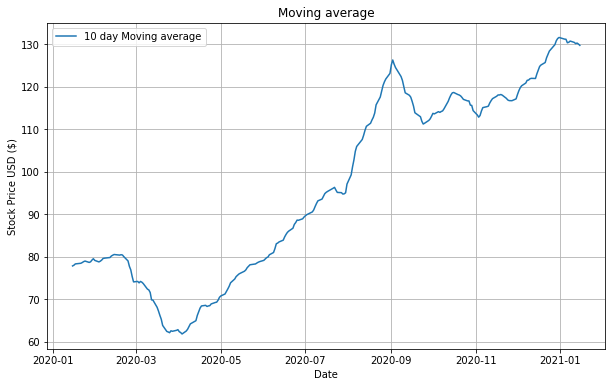

In [47]:
EMA_10 = apple_stocks.Close.ewm(span=10, adjust=False).mean()
plt.figure(figsize=(10,6))
plt.plot(apple_stocks.index, EMA_10, label='10 day Moving average')
plt.title('Moving average')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Relative Strength Index (RSI)

In [27]:
rsi_period = 14             # Considering the last 14 day closing prices

In [28]:
value = apple_stocks['Close'].diff(1)

In [30]:
gain = value.mask(value<0,0)

In [31]:
apple_stocks['gain'] = gain

In [33]:
loss = value.mask(value>0,0)
apple_stocks['loss'] = loss

In [34]:
avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()

In [35]:
apple_stocks['avg_gain'] = avg_gain
apple_stocks['avg_loss'] = avg_loss
rs = abs(avg_gain/avg_loss)                  # Relative Strength (RS)
rsi = 100-(100/(1+rs))                       # Relative Strength Index (RSI)

In [36]:
apple_stocks['RSI'] = rsi

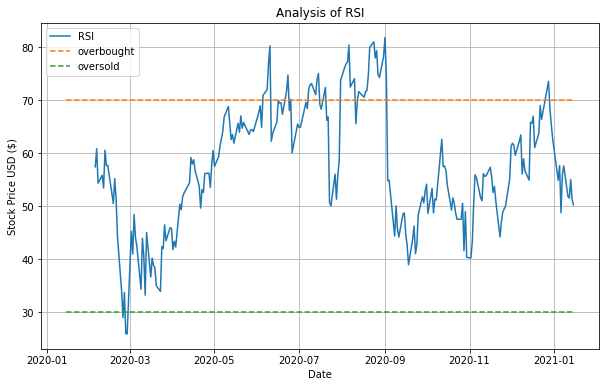

In [48]:
plt.figure(figsize=(10,6))
plt.plot(apple_stocks.index, rsi, label="RSI")
plt.plot(apple_stocks.index, [70] * len(apple_stocks.index), '--', label="overbought")
plt.plot(apple_stocks.index, [30] * len(apple_stocks.index),'--', label="oversold")
plt.title('Analysis of RSI')
plt.xlabel('Date')
plt.ylabel('Stock Price USD ($)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

RSI indicates the changes in magnitude of the prices. If RSI value is greater than 70, the next price will decrease and increases if RSI value is less than 30.